<a href="https://colab.research.google.com/github/AndyAlyf/Klasifikasi-Text/blob/master/classifierProject_betaPresented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import library dan modules yang mo di pake**

In [22]:
!pip install Sastrawi

In [0]:
import math 
import os
from collections import OrderedDict
import re
import string
import datetime
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd
import csv
from sklearn.model_selection import train_test_split

### **Preprocessing**

In [24]:
def dictionLabels(x):
    j_kolomUnik=dict()
    for i in kolom_unik:
        j_kolomUnik[i] = 0
    for i in x:
        j_kolomUnik[i]+=1
    return j_kolomUnik

dok=[]
kolom=[]
kolom_unik=[]
with open("datasetLabelled.csv",encoding='cp1252') as csf:
    readCSV = csv.reader(csf,delimiter=",")
    for i in readCSV:
        dok += [i[0]]
        kolom += [i[1]]
        if i[1] not in kolom_unik:
            kolom_unik += [i[1]]

print(kolom_unik)
print(dictionLabels(kolom))
print(len(kolom_unik))
print(kolom)
print(len(kolom))
print(dok)
print(len(dok))
dok, x_test, kolom, y_test = train_test_split(dok, kolom, test_size = 0.2, random_state = 7)
print()
print("DATASET TRAIN")
print(dok)
print(kolom)
print(dictionLabels(kolom))
print(len(dok))
print()
print("DATASET TEST")
print(x_test)
print(y_test)
print(dictionLabels(y_test))
print(len(y_test))

['ekonomi', 'kuliner', 'otomotif', 'sport', 'teknologi']
{'ekonomi': 24, 'kuliner': 27, 'otomotif': 24, 'sport': 25, 'teknologi': 25}
5
['ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'ekonomi', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'kuliner', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'otomotif', 'sport', 'spor

In [25]:
dok_kolom = []
for i in kolom_unik:
    temp=""
    for j in (range(len(dok))):
        if(kolom[j] == i):
            temp = temp+dok[j]+" "
    dok_kolom += [temp]

print(dok_kolom)

['Dalam rangka mendukung peningkatan wisatawan ke Indonesia, Kementerian BUMN melalui Pelindo III melakukan pengembangan atau revitalisasi kawasan Pelabuhan Benoa menjadi home port cruise untuk pelabuhan-pelabuhan di seluruh wilayah Indonesia. Upaya ini dilakukan dengan telah dilaksanakannya rapat koordinasi pengembangan Benoa Maritime Tourism Hub di Nusa Dua, Bali diadakan 13-14 Februari 2020. Rapat yang dipimpin langsung Menteri BUMN Erick Thohir ini melibatkan Kementerian Perhubungan, Kementerian ATR/BPN, Kementerian Parekraf, Kementerian Keuangan, Kementerian Kelautan dan Perikanan, Kementerian ESDM, dan Kementerian Lingkungan Hidup dan Kehutanan Kota Manado mengalami kekurangan stok gula pasir di pasaran. Pantauan manadobacirita, kondisi ini sudah terjadi sejak dua pekan lalu. Bahkan, di beberapa toko retail tak lagi menyediakan gula pasir premium dengan harga Rp 12.500 per kilogram. Menurut para penjaga toko, stok gula pasir premium sudah habis sejak akhir bulan Januari dan hingg

In [0]:
class preprocessing:
    def parsing(dokumen):
        stopword = open("stopword.txt","r").read().split("\n")
        dokumen = dokumen.lower().split()
        dokumen = [kata for kata in dokumen if kata not in stopword]
        return dokumen
    def cleaning(dokumen):
        tandabaca = string.punctuation
        domain = re.compile(r'[\S]+\.(net|com|org)[\S]*\s?')
        dokumenproses = dokumen.strip()
        dokumenproses = domain.sub('',dokumenproses)
        hasil = ''
        for i,karakter in enumerate(dokumenproses):
            if (karakter in tandabaca or karakter.isnumeric()):
                if (i != len(dokumenproses)-1):
                    nextkarakter = dokumenproses[i+1]
                    if (nextkarakter not in tandabaca and not nextkarakter.isnumeric() and nextkarakter != ' '):
                        hasil += ' '
            else:
                hasil += karakter
        return hasil


    def stemming(dokumen):
        return [StemmerFactory().create_stemmer().stem(kata) for kata in dokumen if kata]

    def preprocess(dokumen):
        return preprocessing.stemming(
            preprocessing.parsing(
                preprocessing.cleaning(dokumen)
            )
        )

### **Pembobotan**

In [27]:
class weighting:
    def __init__(self):
        self.dokumens = []
        self.fitur = []
        self.bobot_tf = []
    def setdokumen(self,dokumens):
        self.dokumens = dokumens
    def getfitur(self):
        self.fitur = list(OrderedDict((kata,None)for dokumen in self.dokumens for kata in dokumen).keys())
        return self.fitur
    def getbobot_tf(self):
        self.bobot_tf = [[dokumen.count(fitur) +1 for dokumen in self.dokumens] for fitur in self.getfitur()]
        return self.bobot_tf
    def normalisasi(bobot_tf_2d):
        transpose = [[bobot_tf_2d [j][i]for j in range (len(bobot_tf_2d))]for i in range (len(bobot_tf_2d[0]))]
        for i,raw in enumerate (bobot_tf_2d):
            pembagi = math.sqrt(sum(math.pow(element,2)for element in raw))
            bobot_tf_2d[i] = [element/pembagi for element in raw]
        arr = [[bobot_tf_2d[j][i]for j in range (len(bobot_tf_2d))]for i in range (len(bobot_tf_2d[0]))]
        return arr

print("mulai",datetime.datetime.now())        
cls = weighting()
cls.setdokumen([preprocessing.preprocess(x)for x in dok_kolom])
fitur = cls.getfitur()
bobot_tf = cls.getbobot_tf()
bobot_weighted = weighting.normalisasi(bobot_tf)
print(fitur)
print(bobot_tf)
print(bobot_weighted)
print("selesai",datetime.datetime.now())

mulai 2020-02-29 05:08:24.226900
['rangka', 'dukung', 'tingkat', 'wisatawan', 'indonesia', 'menteri', 'bumn', 'pelindo', 'kembang', 'revitalisasi', 'kawasan', 'labuh', 'benoa', 'home', 'port', 'cruise', 'wilayah', 'upaya', 'laksana', 'rapat', 'koordinasi', 'maritime', 'tourism', 'hub', 'nusa', 'bal', 'ada', 'pimpin', 'langsung', 'erick', 'thohir', 'libat', 'hubung', 'atr', 'bpn', 'parekraf', 'uang', 'laut', 'ikan', 'esdm', 'lingkung', 'hidup', 'hutan', 'kota', 'manado', 'alami', 'kurang', 'stok', 'gula', 'pasir', 'pasar', 'pantau', 'manadobacirita', 'kondisi', 'pekan', 'toko', 'retail', 'sedia', 'premium', 'harga', 'rp', 'kilogram', 'jaga', 'habis', 'pasok', 'masuk', 'kemarin', 'tip', 'instruksi', 'jual', 'konsumen', 'boleh', 'salah', 'nama', 'dipublish', 'supermarket', 'hypermart', 'kantong', 'ukur', 'orang', 'struk', 'transaksi', 'transmart', 'mending', 'berjejaring', 'carrefour', 'terap', 'bijak', 'maksimal', 'kilograma', 'beli', 'effendi', 'komisi', 'mang', 'penting', 'konsultasi',

### **Predict and Model**

In [0]:
class naifeBayes():
    def __init__(self,data,kolom,kolom_unik,kolomm):
        self.data=data
        self.kolom=kolom
        self.label_unik = kolom_unik
        self.label = kolomm
        

    def prints(self):
        print(self.data)
        print(self.kolom)
        print(self.label_unik)
        print(self.label)

    def prediksiAll(self,w):
        words = w
        high = 0
        kats = ""
        for x in range(len(self.label_unik)):
            temp = 1
            for i in words:
                temp = temp*self.pcd(i,x)
            temp = temp*self.pc(self.label_unik[x])
            print("Peluang masuk kategori",self.label_unik[x],"adalah : ",temp)
            if (temp > high):
                high = temp
                kats = self.label_unik[x]


    def prediksi(self,w):
        words = w
        high = 0
        kats = ""
        for x in range(len(self.label_unik)):
            temp = 1
            for i in words:
                temp = temp*self.pcd(i,x)
            temp = temp*self.pc(self.label_unik[x])
            if (temp > high):
                high = temp
                kats = self.label_unik[x]
        return kats

    def pcd(self,c,x):
        temp = 1
        for i in range(len(self.kolom)):
            if (self.kolom[i] == c):
                temp = self.data[x][i]
        return temp

    def pc(self,x):
        leng = len(self.label)
        sumc = 0
        for i in self.label:
            if (x == i):
                sumc+=1
        temp = sumc / leng
        return temp

    def akurasi(self,l1,l2):
        sum=0
        sumj = len(l1)
        for i in range(len(l1)):
            if(l1[i] == l2[i]):
                sum+=1
        temp = sum/sumj
        return temp


### **Testing dan Akurasi**

In [29]:
nb = naifeBayes(bobot_weighted,fitur,kolom_unik,kolom)
true_label = kolom
artikel_t = dok
test_label =[]
print("mulai",datetime.datetime.now())     
for i in artikel_t:
    kats_arti = preprocessing.preprocess(i)
    kats_arti = [i for i in kats_arti if i in fitur]
    test_label += [nb.prediksi(kats_arti)]

print(true_label)
print(test_label)
print("Akurasi Train: ",nb.akurasi(test_label,true_label))
print("selesai",datetime.datetime.now())     
print()

true_label = y_test
artikel_t = x_test
test_label =[]
print("mulai",datetime.datetime.now())     
for i in artikel_t:
    kats_arti = preprocessing.preprocess(i)
    kats_arti = [i for i in kats_arti if i in fitur]
    test_label += [nb.prediksi(kats_arti)]

print(true_label)
print(test_label)
print("Akurasi Test: ",nb.akurasi(test_label,true_label))
print("selesai",datetime.datetime.now())     

mulai 2020-02-29 05:14:06.790067
['ekonomi', 'teknologi', 'ekonomi', 'sport', 'sport', 'teknologi', 'sport', 'otomotif', 'kuliner', 'kuliner', 'ekonomi', 'teknologi', 'ekonomi', 'sport', 'sport', 'ekonomi', 'kuliner', 'ekonomi', 'sport', 'ekonomi', 'kuliner', 'sport', 'kuliner', 'kuliner', 'otomotif', 'sport', 'sport', 'otomotif', 'sport', 'teknologi', 'kuliner', 'ekonomi', 'kuliner', 'teknologi', 'kuliner', 'ekonomi', 'kuliner', 'teknologi', 'kuliner', 'otomotif', 'teknologi', 'sport', 'otomotif', 'kuliner', 'ekonomi', 'teknologi', 'sport', 'kuliner', 'ekonomi', 'sport', 'ekonomi', 'teknologi', 'teknologi', 'teknologi', 'ekonomi', 'ekonomi', 'kuliner', 'sport', 'otomotif', 'sport', 'kuliner', 'otomotif', 'otomotif', 'otomotif', 'sport', 'kuliner', 'otomotif', 'otomotif', 'otomotif', 'teknologi', 'otomotif', 'ekonomi', 'ekonomi', 'otomotif', 'sport', 'ekonomi', 'kuliner', 'ekonomi', 'kuliner', 'teknologi', 'teknologi', 'kuliner', 'ekonomi', 'sport', 'kuliner', 'teknologi', 'sport', 'ot

### **Test with Inputan**

In [33]:
nb = naifeBayes(bobot_weighted,fitur,kolom_unik,kolom)
artikel = x_test[5]
true_l = y_test[5]
print(artikel)
print(true_l)
kata_artikel = preprocessing.preprocess(artikel)
kata_artikel = [i for i in kata_artikel if i in fitur]
print(kata_artikel)
nb.prediksiAll(kata_artikel)

Kain songket tenun merupakan produk kerajinan andalan Aceh yang memiliki nilai jual tinggi. Motif dan cara pembuatannya yang masih tradisional menjadi daya tarik tersendiri. Salah satu perajin kain songket tenun di Aceh yang masih memakai alat tradisional sederhana untuk menenun ialah Asmarani. Ia mendirikan tempat usaha dengan nama "Tenun Songket Asma", yang beralamat di Gampong Meunasah Serba, Kecamatan Jaya, Aceh Jaya. Dalam menjalankan usahanya, wanita yang akrab disapa Asma ini, mengaku dibantu oleh seorang adiknya. Satu helai songket dengan ragam motif, Asma mematok harga dari Rp 800 ribu. 
ekonomi
['produk', 'rajin', 'andal', 'milik', 'nilai', 'jual', 'buat', 'tradisional', 'daya', 'tarik', 'sendiri', 'salah', 'rajin', 'pakai', 'alat', 'tradisional', 'sederhana', 'diri', 'usaha', 'nama', 'serba', 'camat', 'jalan', 'usaha', 'sapa', 'aku', 'bantu', 'ragam', 'patok', 'harga', 'rp', 'ribu']
Peluang masuk kategori ekonomi adalah :  4.904218864449398e-20
Peluang masuk kategori kuliner

### **Visualisasi dan Presentasi**

In [31]:
present = []
temp_h= ["kata/fitur"]
for i in kolom_unik:
    temp_h += [i]
present+= [temp_h] 

for i in range(len(fitur)):
    temp_h = [fitur[i]]
    for j in range(len(kolom_unik)):
        temp = float(bobot_weighted[j][i])
        jis = f"{temp:.4f}"
        temp_h += [jis]
    present+=[temp_h]

df = pd.DataFrame(present)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

                    0        1        2         3       4          5
0          kata/fitur  ekonomi  kuliner  otomotif   sport  teknologi
1              rangka   0.7071   0.3536    0.3536  0.3536     0.3536
2              dukung   0.5040   0.1260    0.1260  0.3780     0.7559
3             tingkat   0.4804   0.4804    0.3203  0.1601     0.6405
4           wisatawan   0.3536   0.8839    0.1768  0.1768     0.1768
5           indonesia   0.3363   0.3363    0.5464  0.4203     0.5464
6             menteri   0.9861   0.0429    0.0857  0.0429     0.1286
7                bumn   0.9762   0.1085    0.1085  0.1085     0.1085
8             pelindo   0.7071   0.3536    0.3536  0.3536     0.3536
9             kembang   0.6860   0.5145    0.1715  0.3430     0.3430
10       revitalisasi   0.7071   0.3536    0.3536  0.3536     0.3536
11            kawasan   0.9354   0.2673    0.1336  0.1336     0.1336
12              labuh   0.9762   0.1085    0.1085  0.1085     0.1085
13              benoa   0.9285   0

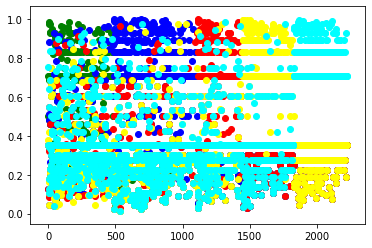

In [32]:
import matplotlib.pyplot as plt
import numpy as np

eko = bobot_weighted[0]
tekn = bobot_weighted[1]
oto = bobot_weighted[2]
spo = bobot_weighted[3]
kul = bobot_weighted[4]

x_l = eko+tekn+oto+spo+kul
# x1 = np.logspace(0, 1, len(spo), endpoint=True)
x1 = range(len(spo))
plt.scatter(x1,eko,c='green')
plt.scatter(x1,tekn,c='blue')
plt.scatter(x1,oto,c='red')
plt.scatter(x1,spo,c='yellow')
plt.scatter(x1,kul,c='cyan')
# plt.ylim([0.1,0.98])
# plt.xlim([0,4])

plt.show()